In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.4/910.4 kB 20.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yaml

# Define the dataset structure
dataset_yaml = {
    'path': '/kaggle/input/scb-dataset/5k_HRW_yolo_Dataset_jpg',  # Base dataset path
    'train': 'images/train',  # Train images path
    'val': 'images/val',      # Validation images path
    'names': {                # Class labels
        0: 'hand-raising',
        1: 'read',
        2: 'write'
    }
}

# File path to save the YAML file
yaml_file_path = '/kaggle/working/dataset.yaml'

# Write the YAML file
with open(yaml_file_path, 'w') as file:
    yaml.dump(dataset_yaml, file, default_flow_style=False)

print(f"YAML file created at {yaml_file_path}")


YAML file created at /kaggle/working/dataset.yaml


In [3]:
from ultralytics import YOLO

# Load the YOLOv8n model
model = YOLO('yolov8n.pt')  # Pretrained YOLOv8n weights

# Train the model
model.train(
    data='/kaggle/working/dataset.yaml',  # Path to the dataset YAML file
    epochs=50,        # Number of epochs
    imgsz=640,        # Image size
    batch=16,         # Batch size
    workers=4,        # Number of data loader workers
    device=0          # Use GPU (0) if available, otherwise CPU
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 107MB/s]


Ultralytics 8.3.64 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 27.0MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/scb-dataset/5k_HRW_yolo_Dataset_jpg/labels/train... 3989 images, 0 backgrounds, 1 corrupt: 100%|██████████| 3989/3989 [00:13<00:00, 296.45it/s]

train: WARNING ⚠️ /kaggle/input/scb-dataset/5k_HRW_yolo_Dataset_jpg/images/train/1276033.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1459]


train: WARNING ⚠️ Cache directory /kaggle/input/scb-dataset/5k_HRW_yolo_Dataset_jpg/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/scb-dataset/5k_HRW_yolo_Dataset_jpg/labels/val... 1026 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1026/1026 [00:03<00:00, 318.16it/s]

val: WARNING ⚠️ /kaggle/input/scb-dataset/5k_HRW_yolo_Dataset_jpg/images/val/3005055.jpg: 1 duplicate labels removed


val: WARNING ⚠️ Cache directory /kaggle/input/scb-dataset/5k_HRW_yolo_Dataset_jpg/labels is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.62G      1.429      2.409       1.38         48        640: 100%|██████████| 250/250 [00:44<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:08<00:00,  3.99it/s]


                   all       1026       5426      0.363      0.478      0.324      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.61G      1.338      1.947      1.339         24        640: 100%|██████████| 250/250 [00:41<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.21it/s]


                   all       1026       5426      0.344      0.465       0.36      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.62G      1.334       1.83      1.335         40        640: 100%|██████████| 250/250 [00:41<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.43it/s]


                   all       1026       5426      0.388      0.489      0.376      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.62G      1.306      1.751      1.331         34        640: 100%|██████████| 250/250 [00:41<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.04it/s]


                   all       1026       5426       0.39      0.514      0.421      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.53G      1.274      1.669      1.311         51        640: 100%|██████████| 250/250 [00:41<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.39it/s]


                   all       1026       5426      0.433       0.51      0.449      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.89G      1.246      1.613      1.297         60        640: 100%|██████████| 250/250 [00:41<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.32it/s]


                   all       1026       5426      0.488      0.572      0.506      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.39G      1.212      1.557      1.274         48        640: 100%|██████████| 250/250 [00:41<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.43it/s]

                   all       1026       5426       0.48      0.569      0.503      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.5G      1.194      1.512      1.265         29        640: 100%|██████████| 250/250 [00:41<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.27it/s]

                   all       1026       5426      0.511      0.578       0.53      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.36G      1.174      1.483      1.249         75        640: 100%|██████████| 250/250 [00:41<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.49it/s]

                   all       1026       5426      0.544      0.576      0.551      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.61G      1.162      1.453      1.242         32        640: 100%|██████████| 250/250 [00:41<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.36it/s]

                   all       1026       5426      0.535       0.59      0.554      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.69G      1.154      1.444      1.238         20        640: 100%|██████████| 250/250 [00:41<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.48it/s]

                   all       1026       5426      0.525      0.611      0.564      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.37G      1.127      1.398       1.22         29        640: 100%|██████████| 250/250 [00:41<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.27it/s]

                   all       1026       5426      0.509      0.601      0.564      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.54G      1.109      1.366      1.212         22        640: 100%|██████████| 250/250 [00:41<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.47it/s]

                   all       1026       5426      0.569      0.584      0.592      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.5G      1.108       1.36      1.211         40        640: 100%|██████████| 250/250 [00:41<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.27it/s]

                   all       1026       5426      0.529      0.626      0.589      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.55G       1.08      1.326      1.194         19        640: 100%|██████████| 250/250 [00:41<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.43it/s]

                   all       1026       5426      0.557      0.611      0.611      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.61G      1.074       1.31      1.194         32        640: 100%|██████████| 250/250 [00:41<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.31it/s]

                   all       1026       5426      0.565      0.619      0.616      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.01G      1.066      1.302      1.187         34        640: 100%|██████████| 250/250 [00:41<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.55it/s]

                   all       1026       5426      0.599      0.601       0.62      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.54G      1.063      1.284       1.18         33        640: 100%|██████████| 250/250 [00:41<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.30it/s]

                   all       1026       5426      0.595      0.603      0.616      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.51G      1.054      1.263      1.178         47        640: 100%|██████████| 250/250 [00:41<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.50it/s]

                   all       1026       5426      0.582      0.609      0.624      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.6G       1.03      1.245      1.165         30        640: 100%|██████████| 250/250 [00:41<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.30it/s]

                   all       1026       5426      0.568      0.618      0.621      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.64G      1.037      1.239      1.166         51        640: 100%|██████████| 250/250 [00:41<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.56it/s]

                   all       1026       5426      0.587      0.635      0.645      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.77G      1.022      1.223       1.16         58        640: 100%|██████████| 250/250 [00:41<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.29it/s]

                   all       1026       5426      0.597      0.633      0.644       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.59G      1.019      1.224      1.157         21        640: 100%|██████████| 250/250 [00:41<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.52it/s]

                   all       1026       5426      0.619      0.633      0.662      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.51G      1.003      1.185      1.147         38        640: 100%|██████████| 250/250 [00:41<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.40it/s]

                   all       1026       5426      0.616      0.639      0.669      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       2.5G     0.9898       1.17      1.141         31        640: 100%|██████████| 250/250 [00:41<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.48it/s]

                   all       1026       5426      0.603      0.651      0.658       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.58G     0.9942       1.18      1.145         48        640: 100%|██████████| 250/250 [00:41<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.38it/s]

                   all       1026       5426      0.638      0.621      0.666      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.57G     0.9764      1.151      1.132         29        640: 100%|██████████| 250/250 [00:41<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.57it/s]

                   all       1026       5426      0.585       0.66       0.66       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.52G      0.985      1.145      1.135         25        640: 100%|██████████| 250/250 [00:41<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.38it/s]

                   all       1026       5426      0.612       0.65       0.67      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.65G     0.9802      1.134      1.129         57        640: 100%|██████████| 250/250 [00:41<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.62it/s]

                   all       1026       5426      0.617      0.655      0.677      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.7G     0.9647      1.117      1.119         53        640: 100%|██████████| 250/250 [00:41<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.22it/s]

                   all       1026       5426      0.611       0.66       0.68      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.41G     0.9587      1.115      1.122         56        640: 100%|██████████| 250/250 [00:41<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.55it/s]

                   all       1026       5426      0.634      0.662      0.694       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.62G     0.9418      1.087       1.11         24        640: 100%|██████████| 250/250 [00:41<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.43it/s]

                   all       1026       5426      0.624      0.662      0.687      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.82G     0.9494      1.083      1.113         43        640: 100%|██████████| 250/250 [00:41<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.44it/s]

                   all       1026       5426      0.625      0.655      0.686      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.69G     0.9418       1.09      1.115         32        640: 100%|██████████| 250/250 [00:41<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.32it/s]

                   all       1026       5426      0.634      0.665      0.687      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.81G      0.929      1.056      1.101         27        640: 100%|██████████| 250/250 [00:41<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.58it/s]

                   all       1026       5426      0.657      0.657      0.699      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.56G     0.9352      1.052      1.101         52        640: 100%|██████████| 250/250 [00:41<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.29it/s]

                   all       1026       5426      0.659      0.651      0.697      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.38G     0.9184      1.042      1.094         18        640: 100%|██████████| 250/250 [00:41<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.58it/s]

                   all       1026       5426      0.644      0.652      0.686      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.76G     0.9181      1.027      1.096         44        640: 100%|██████████| 250/250 [00:41<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.45it/s]

                   all       1026       5426      0.615      0.698      0.701      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.79G     0.9108      1.026      1.089         26        640: 100%|██████████| 250/250 [00:41<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.61it/s]

                   all       1026       5426      0.659      0.652        0.7      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.69G     0.9059      1.026       1.09         28        640: 100%|██████████| 250/250 [00:41<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.41it/s]

                   all       1026       5426       0.64      0.684        0.7      0.522


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.25G     0.8425     0.9029      1.051         10        640: 100%|██████████| 250/250 [00:41<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.52it/s]

                   all       1026       5426      0.635      0.676      0.698      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.31G     0.8273     0.8785      1.038         24        640: 100%|██████████| 250/250 [00:40<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.41it/s]

                   all       1026       5426      0.652      0.669      0.703      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       2.3G     0.8117     0.8687      1.034          9        640: 100%|██████████| 250/250 [00:40<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.58it/s]

                   all       1026       5426      0.649      0.677      0.704      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.32G      0.805     0.8552      1.031         11        640: 100%|██████████| 250/250 [00:40<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.48it/s]

                   all       1026       5426      0.642      0.694      0.706      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.29G     0.8013     0.8417      1.025          7        640: 100%|██████████| 250/250 [00:40<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.48it/s]

                   all       1026       5426      0.656      0.678      0.705      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.28G     0.7938     0.8341      1.023         13        640: 100%|██████████| 250/250 [00:40<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.54it/s]

                   all       1026       5426      0.647      0.685      0.711      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.33G     0.7846     0.8169      1.017         10        640: 100%|██████████| 250/250 [00:40<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.60it/s]

                   all       1026       5426      0.638       0.69      0.708      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.32G     0.7843      0.811      1.014          9        640: 100%|██████████| 250/250 [00:40<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.62it/s]

                   all       1026       5426       0.64      0.691      0.714      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.31G     0.7798     0.8009      1.012         26        640: 100%|██████████| 250/250 [00:40<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.70it/s]

                   all       1026       5426      0.647      0.686      0.714      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       2.3G     0.7808     0.7866      1.014         17        640: 100%|██████████| 250/250 [00:40<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.60it/s]

                   all       1026       5426      0.663      0.672      0.714      0.539



50 epochs completed in 0.673 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.64 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.15it/s]


                   all       1026       5426      0.663      0.673      0.714      0.539
          hand-raising        753       2310      0.779       0.74      0.817      0.599
                  read        378       2433       0.66      0.711      0.736      0.567
                 write        193        683      0.551      0.568      0.589      0.452


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f2ddc2d9de0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

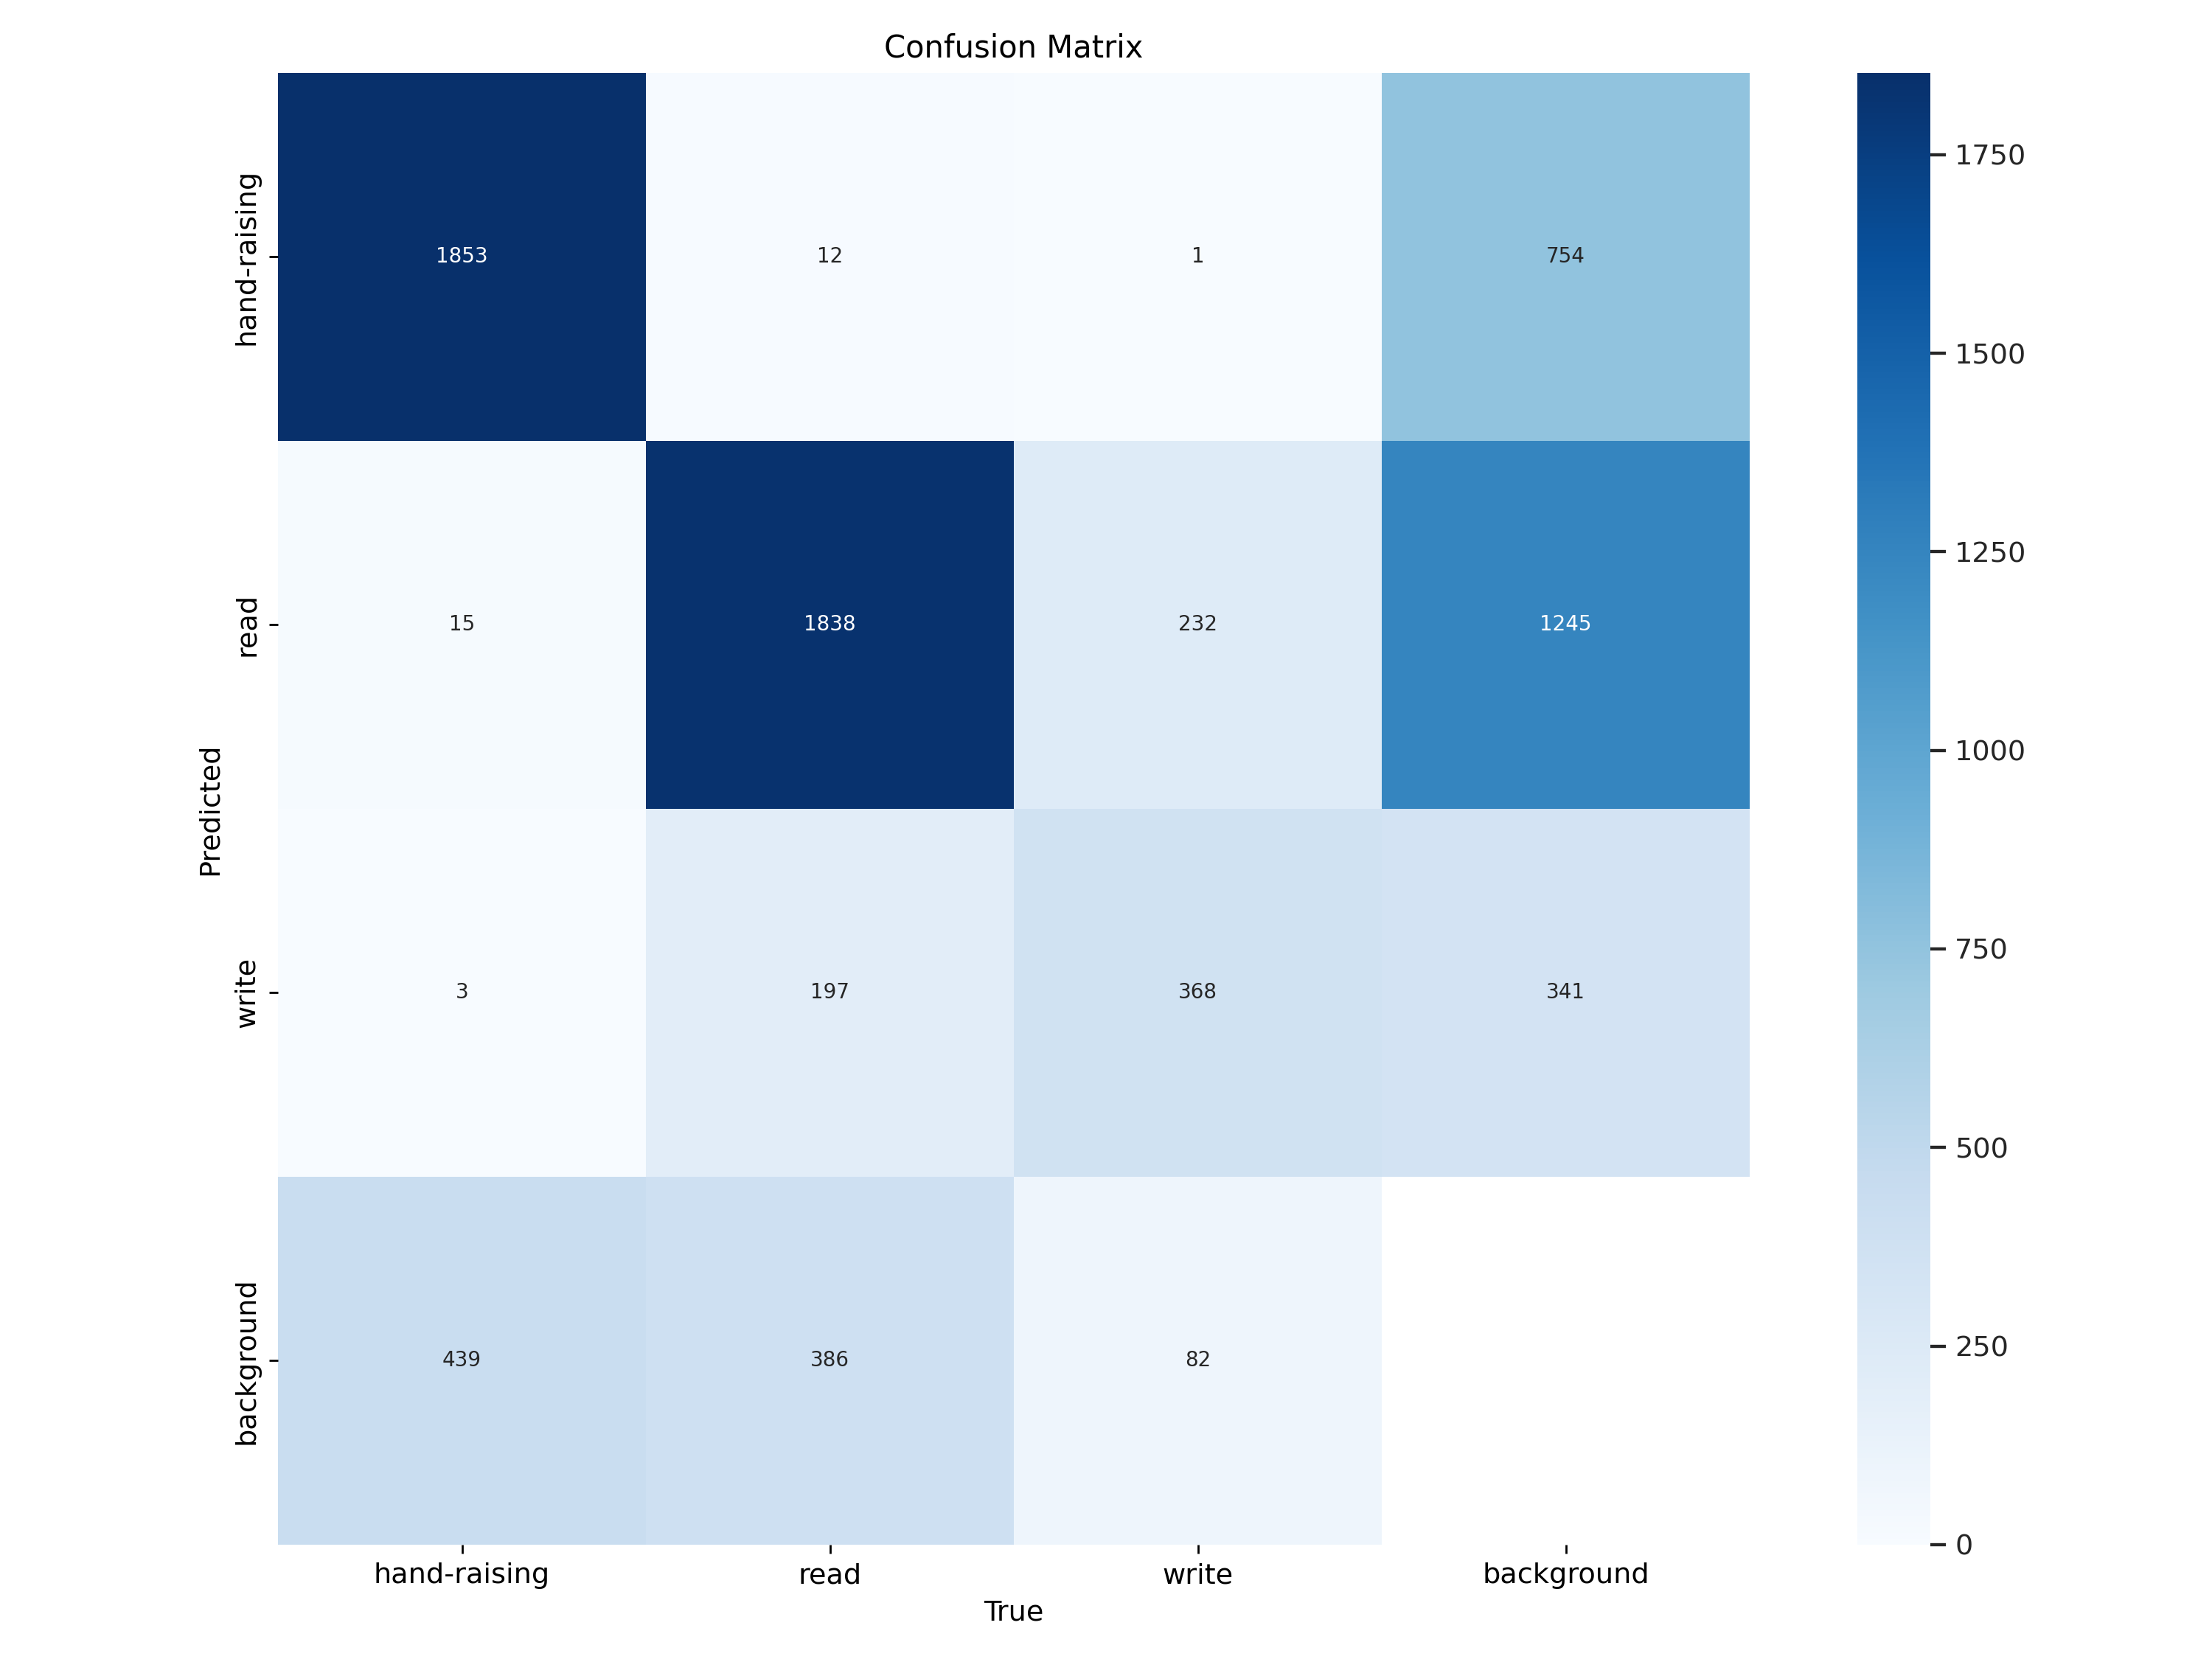

In [4]:
from IPython.display import Image, display

# Path to the confusion matrix image
confusion_matrix_path = '/kaggle/working/runs/detect/train/confusion_matrix.png'

# Display the image
display(Image(filename=confusion_matrix_path))


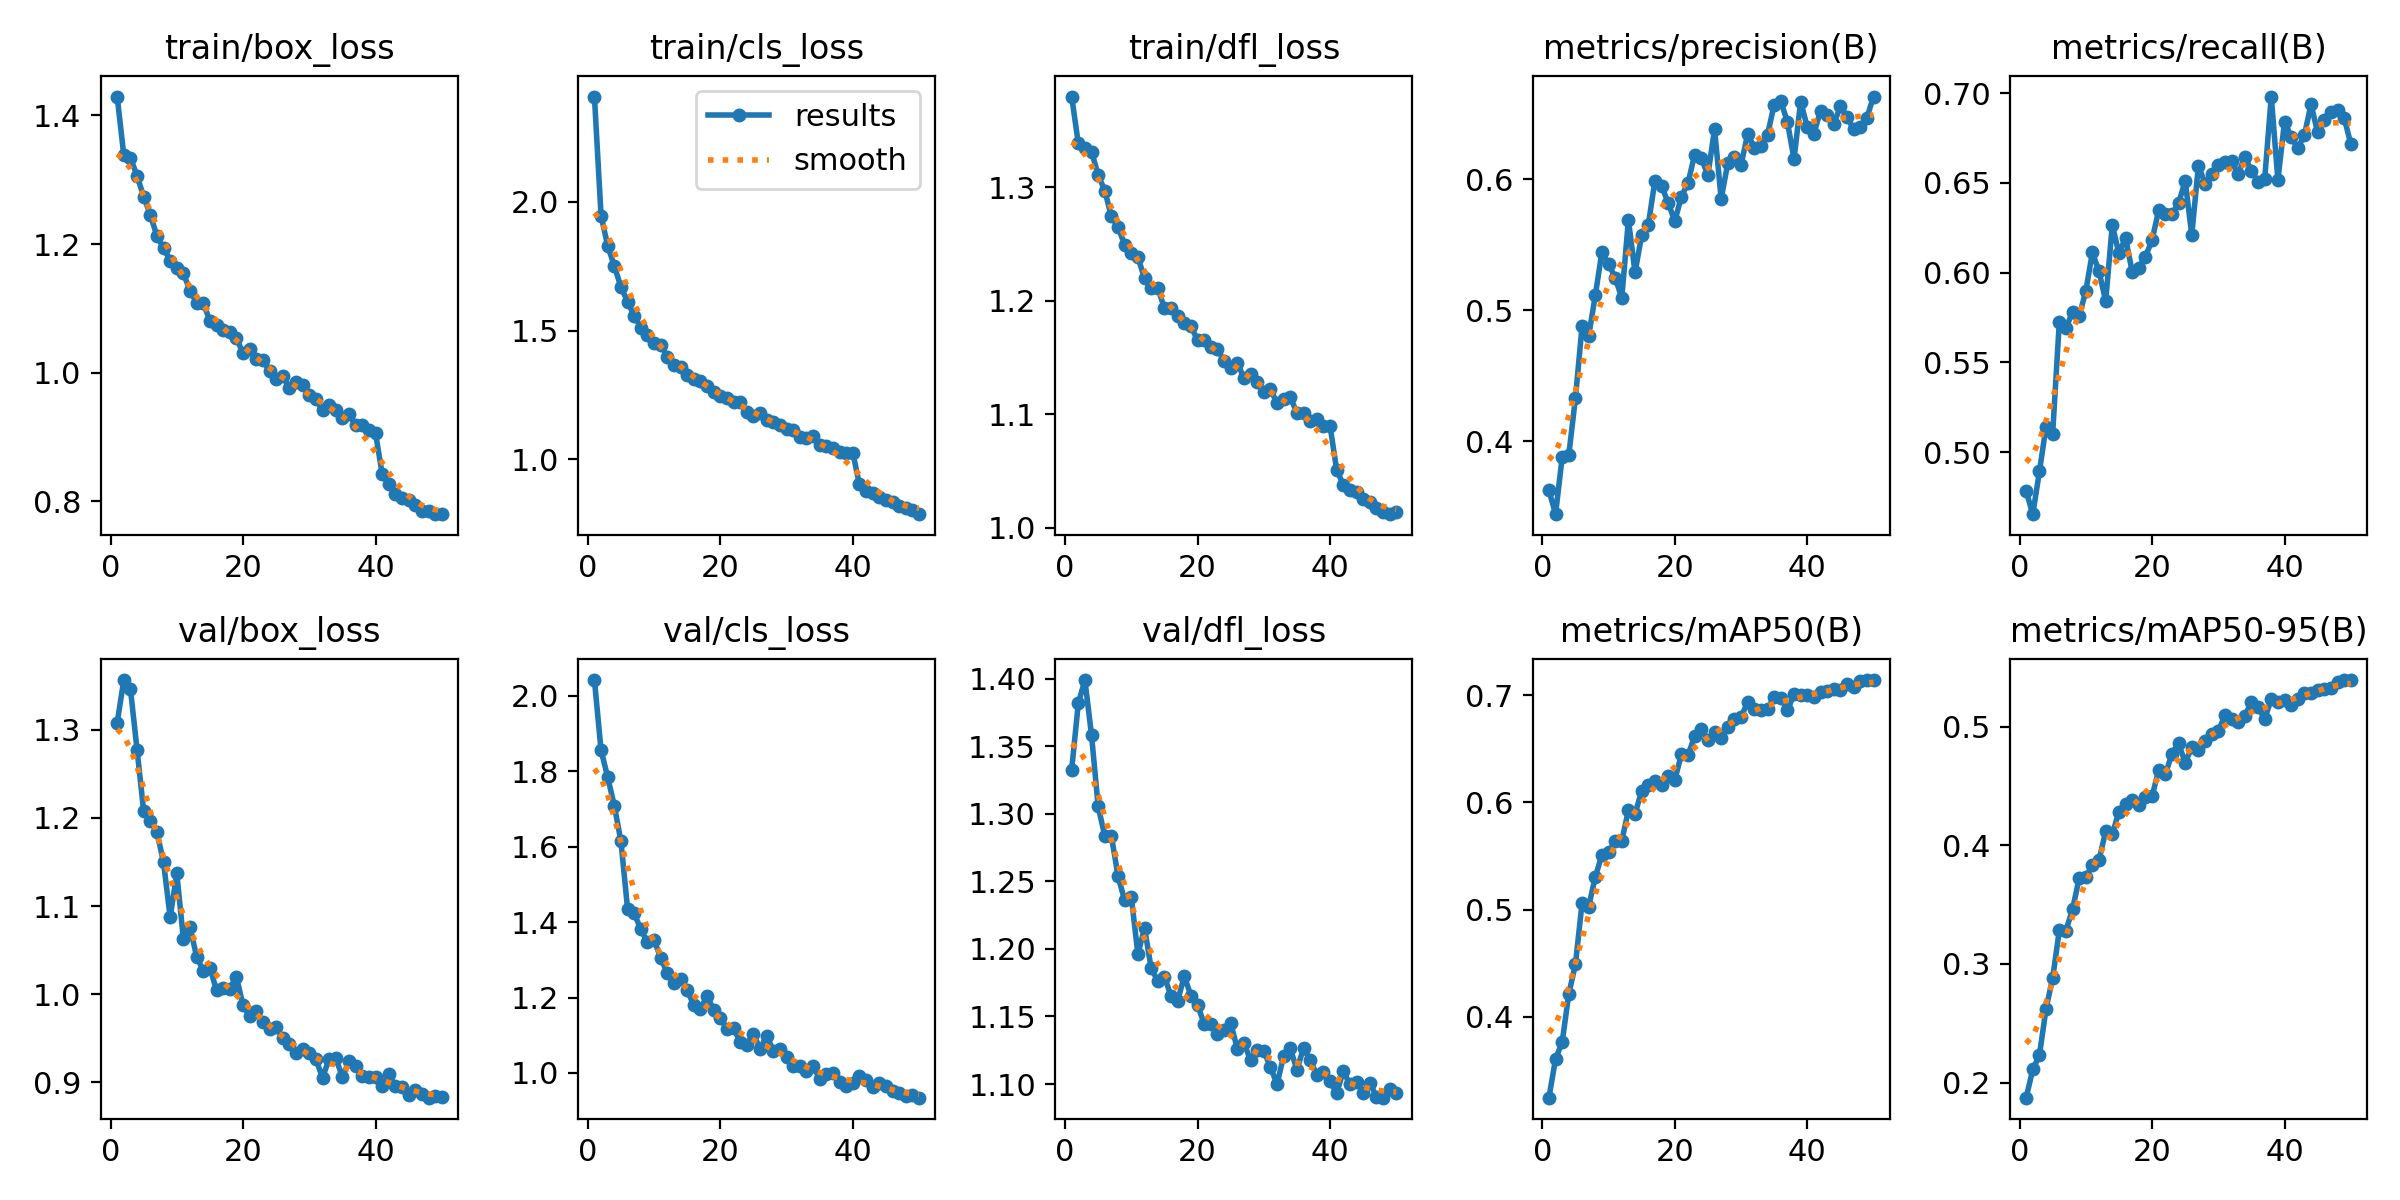

In [5]:
from IPython.display import Image, display

# Path to the confusion matrix image
confusion_matrix_path = '/kaggle/working/runs/detect/train/results.png'

# Display the image
display(Image(filename=confusion_matrix_path))


In [9]:
import pandas as pd
dt=pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
dt

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,56.4015,1.42942,2.40915,1.37993,0.36272,0.47822,0.32441,0.18730,1.30795,2.04218,1.33254,0.000474,0.000474,0.000474
1,2,105.6790,1.33811,1.94697,1.33859,0.34443,0.46540,0.36044,0.21116,1.35644,1.85616,1.38167,0.000932,0.000932,0.000932
2,3,154.5620,1.33404,1.82966,1.33501,0.38790,0.48925,0.37640,0.22319,1.34660,1.78473,1.39891,0.001371,0.001371,0.001371
3,4,203.6840,1.30634,1.75142,1.33134,0.38965,0.51414,0.42117,0.26234,1.27728,1.70922,1.35795,0.001344,0.001344,0.001344
4,5,252.2730,1.27361,1.66938,1.31096,0.43294,0.51036,0.44888,0.28815,1.20773,1.61485,1.30539,0.001316,0.001316,0.001316
5,6,300.7390,1.24587,1.61283,1.29687,0.48762,0.57245,0.50592,0.32828,1.19683,1.43604,1.28344,0.001288,0.001288,0.001288
6,7,349.1010,1.21244,1.55750,1.27431,0.48017,0.56893,0.50283,0.32814,1.18412,1.42386,1.28335,0.001259,0.001259,0.001259
7,8,397.7660,1.19375,1.51187,1.26484,0.51134,0.57825,0.53042,0.34605,1.14959,1.38080,1.25391,0.001231,0.001231,0.001231
8,9,445.9900,1.17410,1.48327,1.24945,0.54439,0.57560,0.55110,0.37227,1.08735,1.34649,1.23580,0.001203,0.001203,0.001203
9,10,494.3450,1.16205,1.45262,1.24221,0.53549,0.58978,0.55353,0.37333,1.13710,1.35285,1.23844,0.001174,0.001174,0.001174


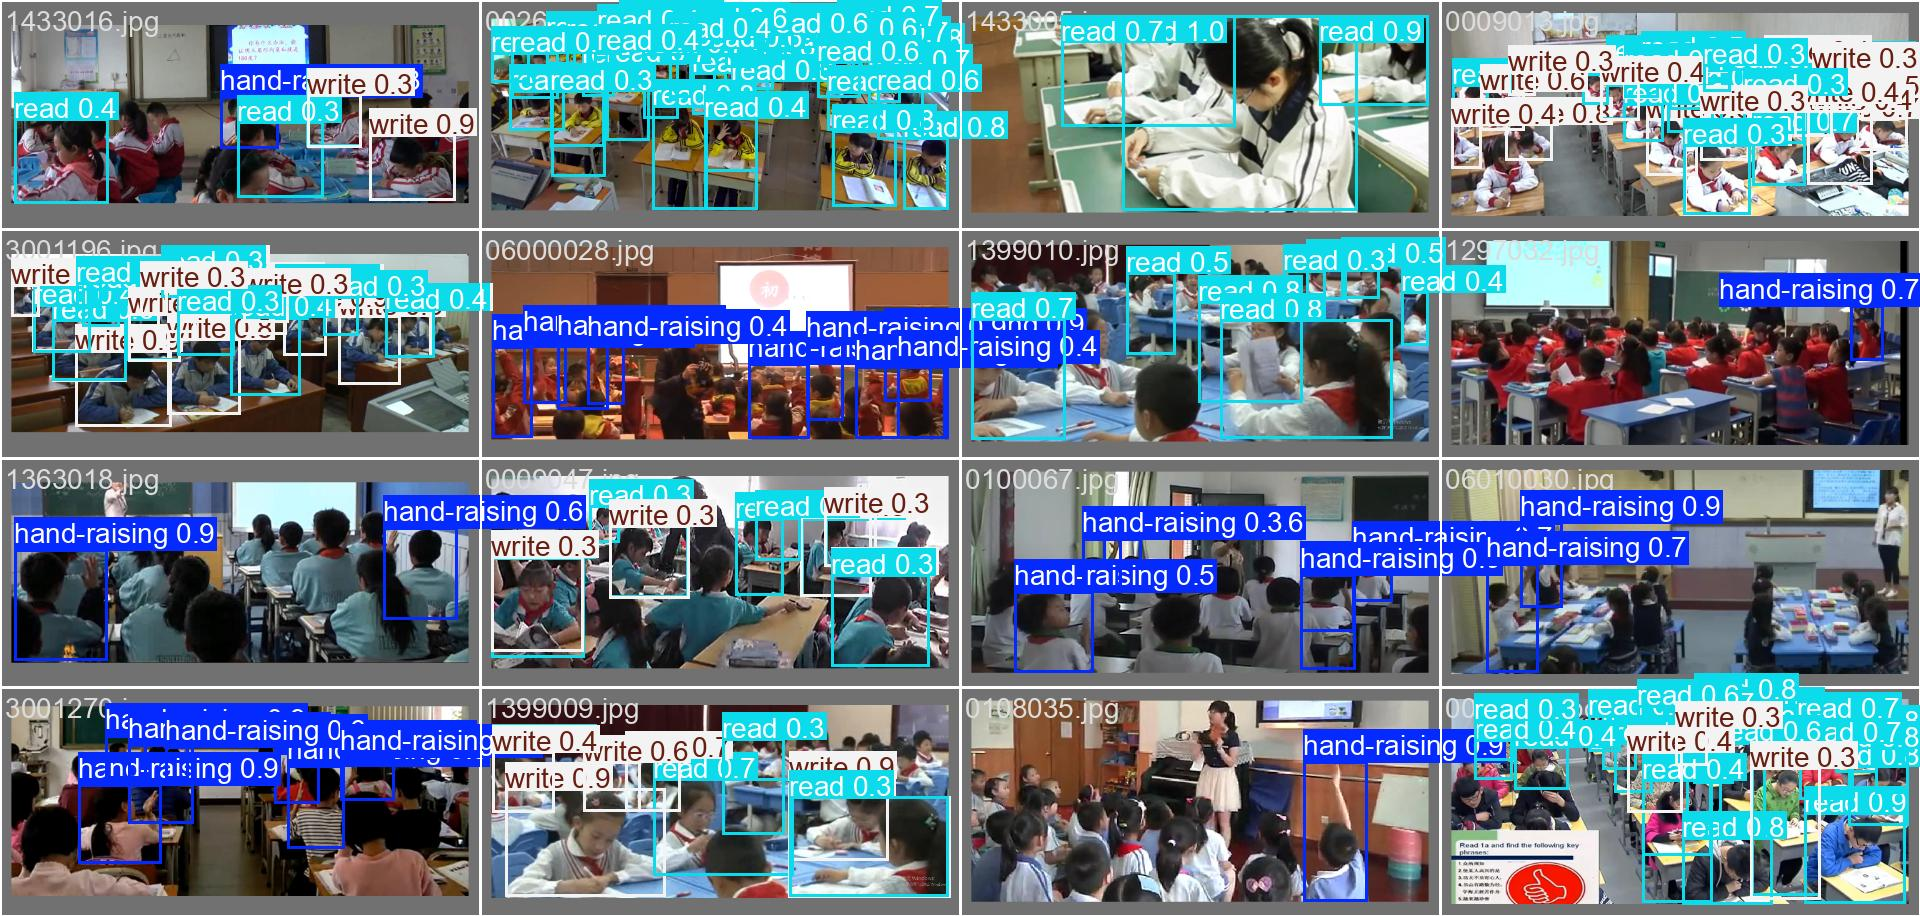

In [6]:
from IPython.display import Image, display

# Path to the confusion matrix image
confusion_matrix_path = '/kaggle/working/runs/detect/train/val_batch0_pred.jpg'

# Display the image
display(Image(filename=confusion_matrix_path))


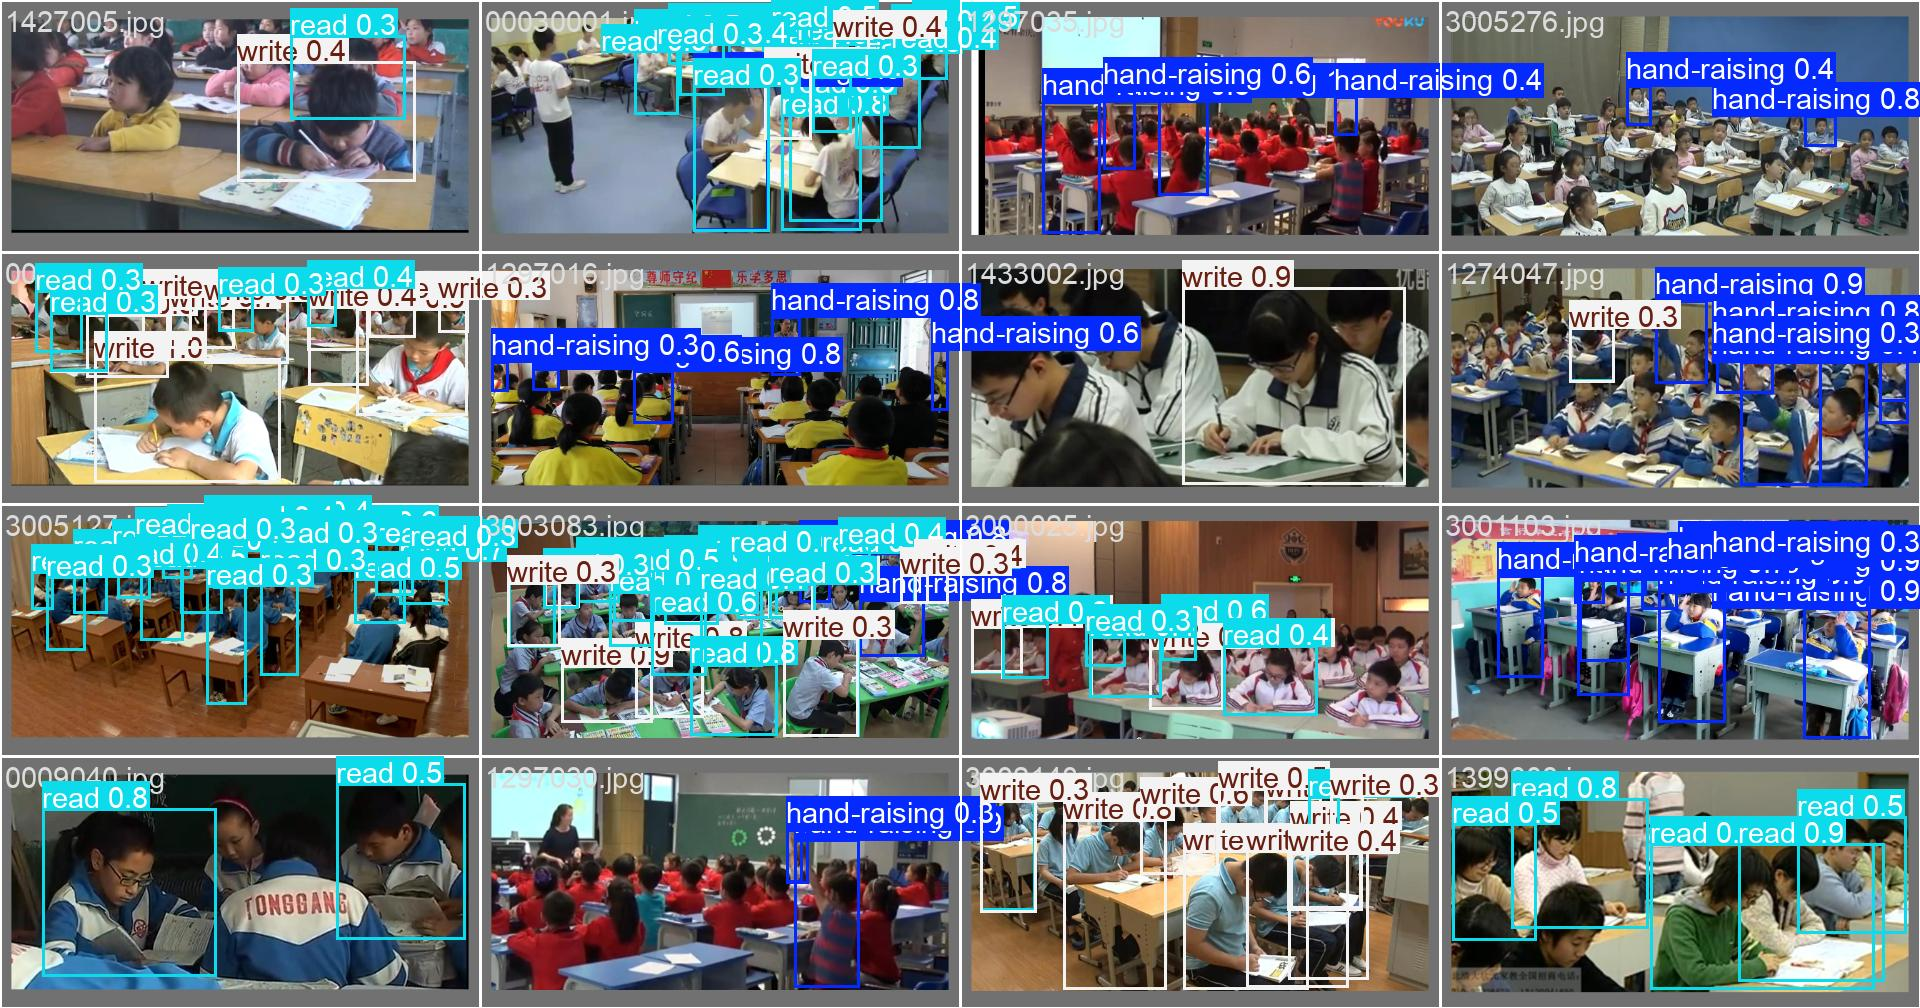

In [7]:
from IPython.display import Image, display

# Path to the confusion matrix image
confusion_matrix_path = '/kaggle/working/runs/detect/train/val_batch1_pred.jpg'

# Display the image
display(Image(filename=confusion_matrix_path))


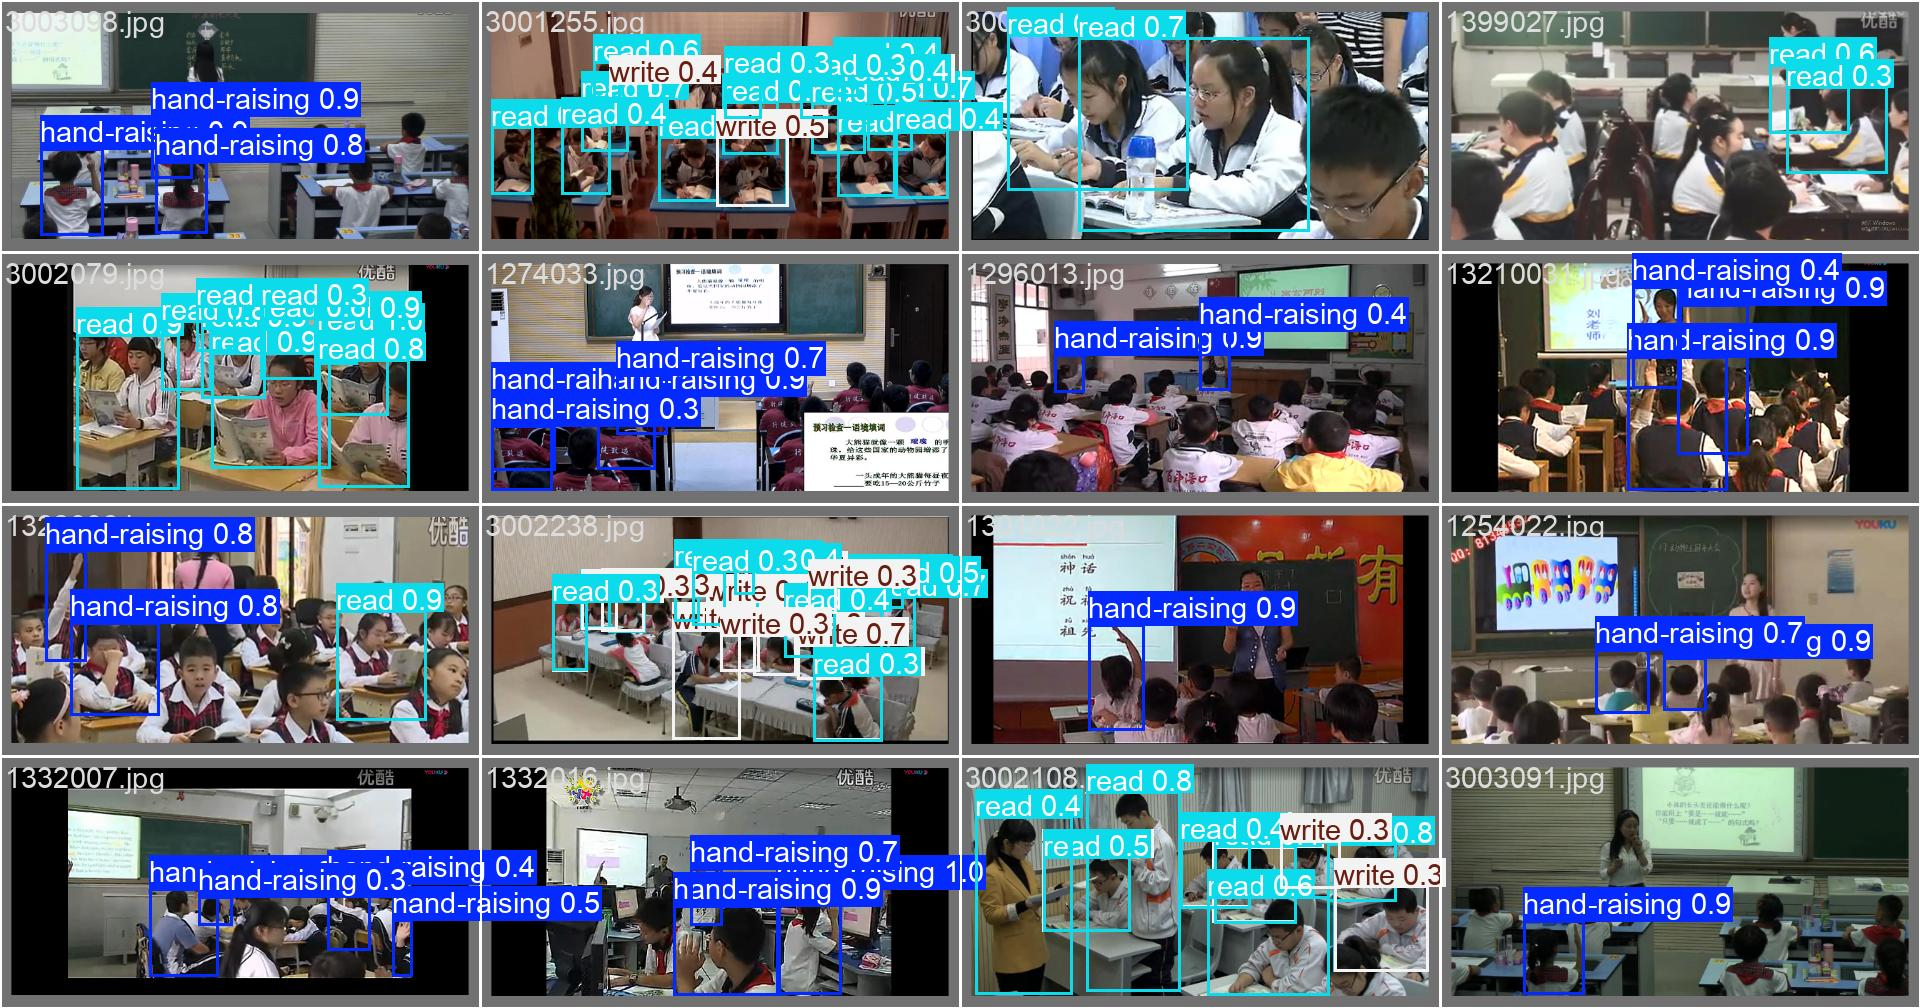

In [8]:
from IPython.display import Image, display

# Path to the confusion matrix image
confusion_matrix_path = '/kaggle/working/runs/detect/train/val_batch2_pred.jpg'

# Display the image
display(Image(filename=confusion_matrix_path))
